In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
data = pd.read_csv('../../data/training.csv') 

In [4]:
data.rename(columns={'MMRAcquisitionAuctionAveragePrice':'MMRAAAP',
                 'MMRAcquisitionAuctionCleanPrice':'MMRAACP',
                 'MMRAcquisitionRetailAveragePrice':'MMRARAP',
                 'MMRAcquisitonRetailCleanPrice':'MMRARCP',
                 'MMRCurrentAuctionAveragePrice':'MMRCAAP',
                 'MMRCurrentAuctionCleanPrice':'MMRCACP',
                 'MMRCurrentRetailAveragePrice':'MMRCRAP',
                 'MMRCurrentRetailCleanPrice':'MMRCRCP',
                }, 
                 inplace=True)

In [5]:
del data['RefId']
del data['IsBadBuy']
del data['VehicleAge']
del data['BYRNO']
del data['IsOnlineSale']
del data['WarrantyCost']
del data['PRIMEUNIT']
del data['AUCGUART']
del data['VNZIP1']
del data['VehYear']
del data['PurchDate']
del data['Trim']
del data['TopThreeAmericanName']
del data['WheelType']
data.corr()

,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
WheelTypeID,1.000000,-0.212432,-0.094658,-0.129608,-0.071736,-0.101796,-0.086798,-0.120046,-0.072684,-0.101250,-0.160986
VehOdo,-0.212432,1.000000,-0.018381,0.023717,0.029107,0.061407,-0.030141,0.010755,0.013719,0.046070,-0.064436
MMRAcquisitionAuctionAveragePrice,-0.094658,-0.018381,1.000000,0.990218,0.910185,0.909832,0.937482,0.931919,0.871220,0.870424,0.789354
MMRAcquisitionAuctionCleanPrice,-0.129608,0.023717,0.990218,1.000000,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604,0.781123
MMRAcquisitionRetailAveragePrice,-0.071736,0.029107,0.910185,0.902339,1.000000,0.990085,0.851330,0.848776,0.912747,0.905523,0.745718
MMRAcquisitonRetailCleanPrice,-0.101796,0.061407,0.909832,0.917934,0.990085,1.000000,0.846393,0.854986,0.902680,0.906231,0.744622
MMRCurrentAuctionAveragePrice,-0.086798,-0.030141,0.937482,0.923144,0.851330,0.846393,1.000000,0.990244,0.915147,0.912305,0.778253
MMRCurrentAuctionCleanPrice,-0.120046,0.010755,0.931919,0.931599,0.848776,0.854986,0.990244,1.000000,0.908620,0.921638,0.774637
MMRCurrentRetailAveragePrice,-0.072684,0.013719,0.871220,0.860055,0.912747,0.902680,0.915147,0.908620,1.000000,0.989693,0.756790
MMRCurrentRetailCleanPrice,-0.101250,0.046070,0.870424,0.870604,0.905523,0.906231,0.912305,0.921638,0.989693,1.000000,0.756551


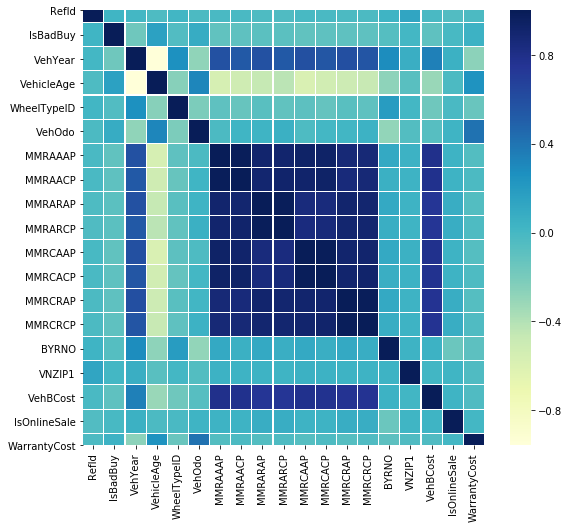

In [5]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 